In [1]:
import sys
sys.path.append("../src")

import os

import cv2
import imgviz
import pyvips
import numpy as np
import matplotlib.pyplot as plt
from utils import (
    pad_img,
    get_args, 
    patchify,
    save_patches,
    save_patch_args, 
    get_target_shape,
    get_nearest_multiple
    )

/Users/ericmonzon/mambaforge/envs/histology/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data_dir = os.path.join("..", "..", "data", "images")
image_names = os.listdir(data_dir)

print("num images:", len(image_names))

num images: 127


In [4]:
image_paths = [os.path.join(data_dir, i) for i in image_names]

In [5]:
slide = pyvips.Image.new_from_file(image_paths[image_names.index("10825.ome.tif")])

In [6]:
wsi = slide.numpy()

wsi.shape

(54082, 46680, 3)

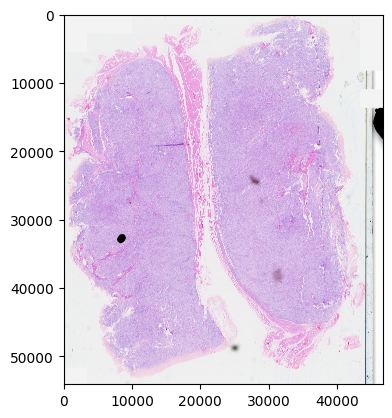

In [6]:
plt.imshow(wsi)
plt.show()

In [7]:
patch_size = 224

target_shape = get_target_shape(wsi, patch_size)

if target_shape != wsi.shape[:2]:
    test_img = wsi.copy()
    test_img = pad_img(test_img, target_shape)

In [8]:
target_shape

(54208, 46816)

In [9]:
# get_nearest_multiple(25088 // 224, 224) *224

In [9]:
wsi.shape

(54082, 46680, 3)

In [11]:
test_img.shape

(23744, 21728, 3)

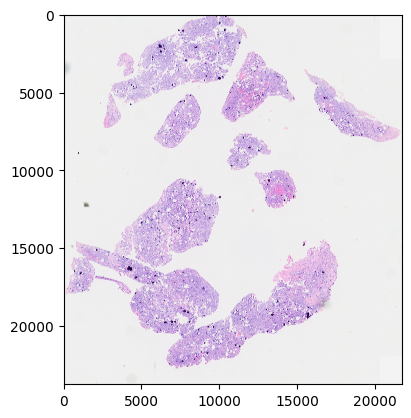

In [12]:
plt.imshow(test_img)
plt.show()

In [24]:
plt.imsave("test.png", test_img)

In [25]:
test_img.shape

(23743, 21728, 3)